In [21]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
%matplotlib inline

In [22]:
df = pd.read_csv("EMG-data.csv")

In [23]:
print(df.head())
print(df.shape)
print("\nempty values:",df.isnull().any().sum()) 

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7   
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000  \
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)

empty values: 0


In [24]:
print("class :", df["class"].unique())
print()
print("Labels :",df["label"].unique()) # 36 people hand gesture data
#print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [25]:
features = df.drop(columns=["label","class","time"])
display(features.head())
#print(features.shape())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [26]:
Class = df["class"]
print(Class.unique())
#print(Class.shape())

[0 1 2 3 4 5 6 7]


In [27]:
print(type(Class))
print(type(features))

Class = Class.values
features = features.values

print(type(Class))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=1)

In [29]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (3390325, 8)
x_test shape (847582, 8)
y_train shape (3390325,)
y_test shape (847582,)


In [30]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [31]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (3390325, 8)
x_test shape (847582, 8)
y_train shape (3390325,)
y_test shape (847582,)


In [32]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [33]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (3390325, 8)
x_test shape (847582, 8)
y_train shape (3390325, 8)
y_test shape (847582, 8)


In [34]:
# creating a function for plotting
def plot(loss,val_loss,acc,val_acc):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

In [40]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define input shape
input_shape = (8, 1)

# Define model architecture
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=1)) # Change pool_size to 1
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1)) # Change pool_size to 1
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
# saving model, creating log for tensorboaed and applying few callbacks

def callbacks(Log,Dir):
  import tensorflow as tf
  import os

  Filepath = Path
  logdir = os.path.join(Filepath, Dir)
  
  callbacks_list = [tf.keras.callbacks.TensorBoard(
                    log_dir=logdir,                 #  tensorboard log path      
                    histogram_freq=1,),
                    tf.keras.callbacks.EarlyStopping(   # stop if not improving
                    monitor='val_accuracy',patience=2,),           # monitor validation accuracy
                    #tf.keras.callbacks.ReduceLROnPlateau(
                    #monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                    #patience=10,),                # reduce the lrate if val loss stop improving
                    tf.keras.callbacks.ModelCheckpoint(
                    filepath= Filepath,             # save model path
                    monitor='val_loss',             # only save best weights
                    save_best_only=True,)]
  return callbacks_list

Epoch 1/200
6617/6622 [============================>.] - ETA: 0s - loss: 0.9134 - accuracy: 0.6456

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 39s 6ms/step - loss: 0.9134 - accuracy: 0.6456 - val_loss: 0.8922 - val_accuracy: 0.6483
Epoch 2/200
6621/6622 [============================>.] - ETA: 0s - loss: 0.8859 - accuracy: 0.6501

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 37s 6ms/step - loss: 0.8859 - accuracy: 0.6501 - val_loss: 0.8821 - val_accuracy: 0.6509
Epoch 3/200
6618/6622 [============================>.] - ETA: 0s - loss: 0.8753 - accuracy: 0.6538

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 37s 6ms/step - loss: 0.8752 - accuracy: 0.6538 - val_loss: 0.8721 - val_accuracy: 0.6540
Epoch 4/200
6621/6622 [============================>.] - ETA: 0s - loss: 0.8659 - accuracy: 0.6574

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 38s 6ms/step - loss: 0.8659 - accuracy: 0.6574 - val_loss: 0.8626 - val_accuracy: 0.6591
Epoch 5/200
6616/6622 [============================>.] - ETA: 0s - loss: 0.8574 - accuracy: 0.6609

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 39s 6ms/step - loss: 0.8574 - accuracy: 0.6609 - val_loss: 0.8556 - val_accuracy: 0.6614
Epoch 6/200
6613/6622 [============================>.] - ETA: 0s - loss: 0.8500 - accuracy: 0.6642

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 40s 6ms/step - loss: 0.8500 - accuracy: 0.6641 - val_loss: 0.8511 - val_accuracy: 0.6641
Epoch 7/200
6617/6622 [============================>.] - ETA: 0s - loss: 0.8434 - accuracy: 0.6676

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 40s 6ms/step - loss: 0.8433 - accuracy: 0.6676 - val_loss: 0.8480 - val_accuracy: 0.6661
Epoch 8/200
6615/6622 [============================>.] - ETA: 0s - loss: 0.8376 - accuracy: 0.6704

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 41s 6ms/step - loss: 0.8376 - accuracy: 0.6704 - val_loss: 0.8400 - val_accuracy: 0.6693
Epoch 9/200
6618/6622 [============================>.] - ETA: 0s - loss: 0.8325 - accuracy: 0.6728

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 43s 6ms/step - loss: 0.8325 - accuracy: 0.6728 - val_loss: 0.8371 - val_accuracy: 0.6703
Epoch 10/200
6619/6622 [============================>.] - ETA: 0s - loss: 0.8282 - accuracy: 0.6745

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 41s 6ms/step - loss: 0.8282 - accuracy: 0.6745 - val_loss: 0.8340 - val_accuracy: 0.6718
Epoch 11/200
6618/6622 [============================>.] - ETA: 0s - loss: 0.8244 - accuracy: 0.6761

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 39s 6ms/step - loss: 0.8244 - accuracy: 0.6761 - val_loss: 0.8298 - val_accuracy: 0.6744
Epoch 12/200
6617/6622 [============================>.] - ETA: 0s - loss: 0.8212 - accuracy: 0.6777

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 42s 6ms/step - loss: 0.8211 - accuracy: 0.6777 - val_loss: 0.8275 - val_accuracy: 0.6760
Epoch 13/200
6620/6622 [============================>.] - ETA: 0s - loss: 0.8184 - accuracy: 0.6789

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 47s 7ms/step - loss: 0.8184 - accuracy: 0.6788 - val_loss: 0.8270 - val_accuracy: 0.6759
Epoch 14/200
6614/6622 [============================>.] - ETA: 0s - loss: 0.8157 - accuracy: 0.6801

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 44s 7ms/step - loss: 0.8157 - accuracy: 0.6801 - val_loss: 0.8222 - val_accuracy: 0.6781
Epoch 15/200
6618/6622 [============================>.] - ETA: 0s - loss: 0.8133 - accuracy: 0.6812

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 45s 7ms/step - loss: 0.8133 - accuracy: 0.6812 - val_loss: 0.8188 - val_accuracy: 0.6791
Epoch 16/200
6615/6622 [============================>.] - ETA: 0s - loss: 0.8112 - accuracy: 0.6822

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 43s 7ms/step - loss: 0.8112 - accuracy: 0.6822 - val_loss: 0.8183 - val_accuracy: 0.6803
Epoch 17/200
6616/6622 [============================>.] - ETA: 0s - loss: 0.8091 - accuracy: 0.6830

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 46s 7ms/step - loss: 0.8091 - accuracy: 0.6830 - val_loss: 0.8139 - val_accuracy: 0.6807
Epoch 18/200
6622/6622 [==============================] - 42s 6ms/step - loss: 0.8071 - accuracy: 0.6841 - val_loss: 0.8149 - val_accuracy: 0.6813
Epoch 19/200
6620/6622 [============================>.] - ETA: 0s - loss: 0.8054 - accuracy: 0.6850

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 36s 5ms/step - loss: 0.8054 - accuracy: 0.6850 - val_loss: 0.8121 - val_accuracy: 0.6821
Epoch 20/200
6620/6622 [============================>.] - ETA: 0s - loss: 0.8038 - accuracy: 0.6857

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 44s 7ms/step - loss: 0.8038 - accuracy: 0.6857 - val_loss: 0.8098 - val_accuracy: 0.6837
Epoch 21/200
6614/6622 [============================>.] - ETA: 0s - loss: 0.8024 - accuracy: 0.6862

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 43s 7ms/step - loss: 0.8024 - accuracy: 0.6862 - val_loss: 0.8096 - val_accuracy: 0.6839
Epoch 22/200
6622/6622 [==============================] - 42s 6ms/step - loss: 0.8008 - accuracy: 0.6871 - val_loss: 0.8096 - val_accuracy: 0.6841
Epoch 23/200
6622/6622 [==============================] - ETA: 0s - loss: 0.7998 - accuracy: 0.6875

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 43s 7ms/step - loss: 0.7998 - accuracy: 0.6875 - val_loss: 0.8078 - val_accuracy: 0.6856
Epoch 24/200
6622/6622 [==============================] - 41s 6ms/step - loss: 0.7984 - accuracy: 0.6882 - val_loss: 0.8086 - val_accuracy: 0.6843
Epoch 25/200
6617/6622 [============================>.] - ETA: 0s - loss: 0.7973 - accuracy: 0.6889

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 42s 6ms/step - loss: 0.7973 - accuracy: 0.6889 - val_loss: 0.8049 - val_accuracy: 0.6859
Epoch 26/200
6622/6622 [==============================] - 41s 6ms/step - loss: 0.7962 - accuracy: 0.6892 - val_loss: 0.8051 - val_accuracy: 0.6853
Epoch 27/200
6617/6622 [============================>.] - ETA: 0s - loss: 0.7952 - accuracy: 0.6898

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 42s 6ms/step - loss: 0.7952 - accuracy: 0.6898 - val_loss: 0.8036 - val_accuracy: 0.6861
Epoch 28/200
6615/6622 [============================>.] - ETA: 0s - loss: 0.7939 - accuracy: 0.6905

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 42s 6ms/step - loss: 0.7939 - accuracy: 0.6905 - val_loss: 0.8034 - val_accuracy: 0.6864
Epoch 29/200
6619/6622 [============================>.] - ETA: 0s - loss: 0.7931 - accuracy: 0.6908

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 41s 6ms/step - loss: 0.7932 - accuracy: 0.6908 - val_loss: 0.8012 - val_accuracy: 0.6879
Epoch 30/200
6622/6622 [==============================] - 41s 6ms/step - loss: 0.7923 - accuracy: 0.6912 - val_loss: 0.8023 - val_accuracy: 0.6872
Epoch 31/200
6618/6622 [============================>.] - ETA: 0s - loss: 0.7913 - accuracy: 0.6917

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 41s 6ms/step - loss: 0.7913 - accuracy: 0.6917 - val_loss: 0.7999 - val_accuracy: 0.6886
Epoch 32/200
6622/6622 [==============================] - 38s 6ms/step - loss: 0.7905 - accuracy: 0.6918 - val_loss: 0.8009 - val_accuracy: 0.6876
Epoch 33/200
6622/6622 [==============================] - ETA: 0s - loss: 0.7897 - accuracy: 0.6924

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 38s 6ms/step - loss: 0.7897 - accuracy: 0.6924 - val_loss: 0.7994 - val_accuracy: 0.6888
Epoch 34/200
6619/6622 [============================>.] - ETA: 0s - loss: 0.7888 - accuracy: 0.6932

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


6622/6622 [==============================] - 39s 6ms/step - loss: 0.7888 - accuracy: 0.6932 - val_loss: 0.7980 - val_accuracy: 0.6899
Epoch 35/200
6622/6622 [==============================] - 38s 6ms/step - loss: 0.7881 - accuracy: 0.6936 - val_loss: 0.7981 - val_accuracy: 0.6895
Epoch 36/200
6622/6622 [==============================] - 41s 6ms/step - loss: 0.7874 - accuracy: 0.6935 - val_loss: 0.7983 - val_accuracy: 0.6896


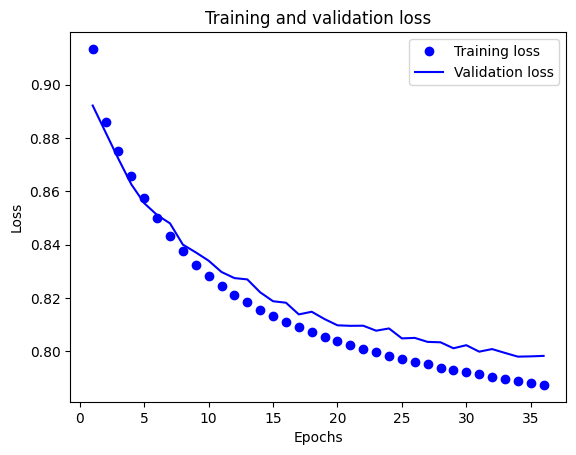

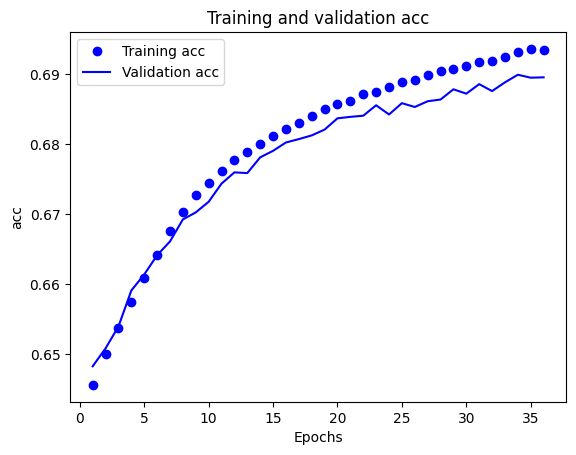

In [42]:
Path = "model1"
Dir = "my_log_dir"   
Call_B_Fun = callbacks(Path,Dir)

batch_size = 512            
epochs = 200                

history = model.fit(x_train.reshape(x_train.shape[0],8,1), y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2, callbacks=Call_B_Fun,
                    validation_data=(x_test.reshape(x_test.shape[0],8,1), y_test))


loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)